In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
pos_path = "/content/test_Arabic_tweets_positive_20190413 (1).tsv"
neg_path = "/content/test_Arabic_tweets_negative_20190413.tsv"

positive = pd.read_csv(pos_path, sep="\t", names=["text"])
negative = pd.read_csv(neg_path, sep="\t", names=["text"])

positive["label"] = 1
negative["label"] = 0

data = pd.concat([positive, negative], ignore_index=True)

In [ ]:
data.head()

,text,label
0,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...,1
1,صباحك خيرات ومسرات 🌸,1
2,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...,1
3,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...,1
4,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11520 non-null  object
 1   label   11520 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 180.1+ KB


In [ ]:
data.isnull().sum()

,0
text,0
label,0


# Pre Processing

In [ ]:
import string

In [ ]:
punct=string.punctuation

In [ ]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    text_nonpunct=''.join([char for char in text if char not in punct])
    return text_nonpunct

In [ ]:
data['text_nonpunct']=data['text'].apply(lambda x:remove_punct(x.lower()))

In [ ]:
data.head()

,text,label,text_nonpunct
0,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...,1,الهلالالاهلي فوز هلالي مهم الحمد لله 💙 زوران ك...
1,صباحك خيرات ومسرات 🌸,1,صباحك خيرات ومسرات 🌸
2,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...,1,تأمل قال الله ﷻ ​﴿بواد غير ذي زرع ﴾ 💫💫 ✍ ومع...
3,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...,1,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...
4,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...,1,رساله صباحيه 💛 اللهم اسألك التوفيق في جميع ام...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
StopWords = stopwords.words('arabic')

In [ ]:
StopWords[:5]

['إذ', 'إذا', 'إذما', 'إذن', 'أف']

In [ ]:
def remove_stopwords(text):
    filtered_text = ' '.join(word for word in text.split() if word.lower() not in StopWords)
    return filtered_text

data['text_nonStopwords']=data['text_nonpunct'].apply(lambda x : remove_stopwords(x))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(
    oov_token="<OOV>"
)
tokenizer.fit_on_texts(data['text_nonStopwords'])

In [ ]:
data['text_sequences'] = tokenizer.texts_to_sequences(data['text_nonStopwords'])

In [ ]:
for word, index in tokenizer.word_index.items():
    print(word, index)
    if index == 10:
        break

<OOV> 1
الله 2
💔 3
، 4
😂 5
💙 6
اللهم 7
😭 8
الهلال 9
انا 10


In [ ]:
vocab_size = len(tokenizer.word_index)

In [ ]:
data.head()

,text,label,text_nonpunct,text_nonStopwords,text_sequences
0,#الهلال_الاهلي فوز هلالي مهم الحمد لله 💙 زوران...,1,الهلالالاهلي فوز هلالي مهم الحمد لله 💙 زوران ك...,الهلالالاهلي فوز هلالي مهم الحمد لله 💙 زوران ب...,"[97, 35, 674, 895, 37, 29, 6, 467, 7857, 186, ..."
1,صباحك خيرات ومسرات 🌸,1,صباحك خيرات ومسرات 🌸,صباحك خيرات ومسرات 🌸,"[150, 7861, 13076, 33]"
2,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...,1,تأمل قال الله ﷻ ​﴿بواد غير ذي زرع ﴾ 💫💫 ✍ ومع...,تأمل قال الله ﷻ ​﴿بواد زرع ﴾ 💫💫 ✍ ومع هتف بالد...,"[837, 47, 2, 724, 964, 838, 241, 896, 675, 725..."
3,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...,1,😂😂 يا جدعان الرجاله اللي فوق ال دول خطر ع تويت...,😂😂 جدعان الرجاله اللي ال دول خطر تويتر وربنا 😂...,"[151, 2142, 3496, 12, 158, 897, 2143, 431, 138..."
4,رساله صباحيه : 💛 اللهم اسألك التوفيق في جميع ا...,1,رساله صباحيه 💛 اللهم اسألك التوفيق في جميع ام...,رساله صباحيه 💛 اللهم اسألك التوفيق امورنا واكت...,"[2145, 4229, 25, 7, 1539, 1720, 4230, 2146, 21..."


In [ ]:
from collections import Counter

# Compute sequence lengths
sequence_lengths = [len(seq) for seq in data['text_sequences']]

# Count frequencies of each length
length_counts = Counter(sequence_lengths)

# Prepare data for plotting
lengths = list(length_counts.keys())
counts = list(length_counts.values())

In [ ]:
length_counts.most_common(5)

[(3, 967), (4, 898), (5, 826), (6, 695), (14, 682)]

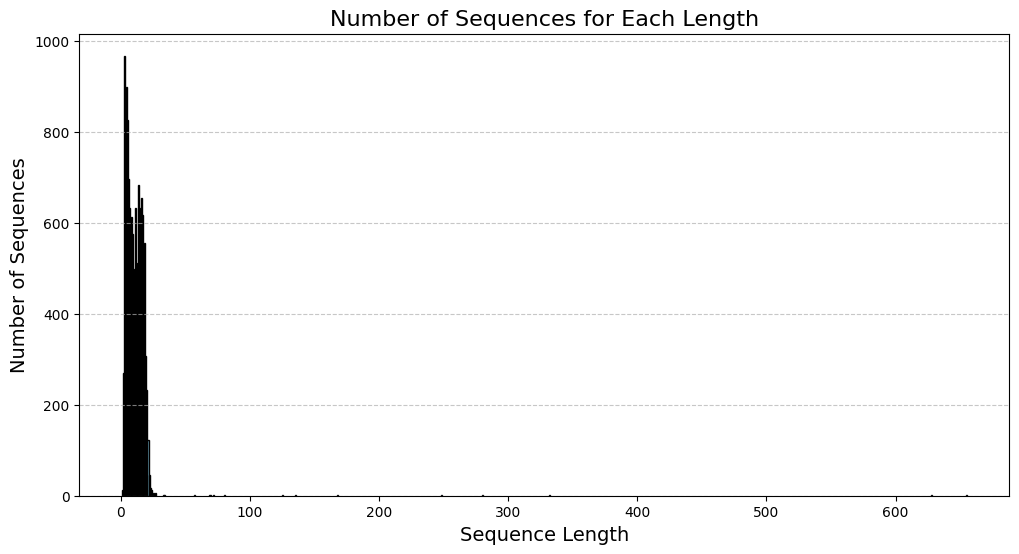

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(lengths, counts, color='skyblue', edgecolor='black')
plt.title('Number of Sequences for Each Length', fontsize=16)
plt.xlabel('Sequence Length', fontsize=14)
plt.ylabel('Number of Sequences', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
input_shape = 70

In [ ]:
# Sequence Padding
from tensorflow import  keras
from keras.preprocessing.sequence import pad_sequences
X=pad_sequences(data['text_sequences'],
    maxlen=input_shape,
    padding='post',
    truncating='post',
)

In [ ]:
y=data['label']

In [ ]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
y=LB.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=100) # encoded_matrix
print("X_train : \n",X_train)
print("X_test  : \n",X_test)


X_train : 
 [[  695  1762   110 ...     0     0     0]
 [  476     2   477 ...     0     0     0]
 [20784 20785  9634 ...     0     0     0]
 ...
 [    2  3420   141 ...     0     0     0]
 [  123   154  3116 ...     0     0     0]
 [    7  1673   210 ...     0     0     0]]
X_test  : 
 [[ 1184  1185  4208 ...     0     0     0]
 [  876   389   799 ...     0     0     0]
 [   11   389   384 ...     0     0     0]
 ...
 [  485 11567  1710 ...     0     0     0]
 [   37   352   113 ...     0     0     0]
 [ 1332  6171  2235 ...     0     0     0]]


In [ ]:
print("X_train shape : ",X_train.shape)
print("X_test  shape : ",X_test.shape)

X_train shape :  (9216, 70)
X_test  shape :  (2304, 70)


# RNN Model 81%

In [ ]:

# Define the model
model = tf.keras.models.Sequential([
    # Embedding layer
    tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[input_shape]),  # Embedding layer

    # RNN layer
    tf.keras.layers.SimpleRNN(32, return_sequences=True),  # RNN layer

    # Batch Normalization after RNN
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # RNN layer
    tf.keras.layers.SimpleRNN(32, return_sequences=False),  # RNN layer

    # Batch Normalization after RNN
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # Dropout layer for regularization
    tf.keras.layers.Dropout(0.25),  # Dropout layer

    # Dense output layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(4, activation="softmax")  # Output layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 70, 32)         │     1,107,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 70, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 70, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,112,420 (4.24 MB)

 Trainable params: 1,112,292 (4.24 MB)

 Non-trainable params: 128 (512.00 B)

None


In [ ]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
231/231 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.3448 - loss: 1.4799 - val_accuracy: 0.6074 - val_loss: 0.9161
Epoch 2/25
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5723 - loss: 0.9019 - val_accuracy: 0.6480 - val_loss: 0.6844
Epoch 3/25
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7083 - loss: 0.6443 - val_accuracy: 0.7185 - val_loss: 0.6182
Epoch 4/25
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8699 - loss: 0.3853 - val_accuracy: 0.7614 - val_loss: 0.6242
Epoch 5/25
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9421 - loss: 0.1864 - val_accuracy: 0.7809 - val_loss: 0.6866
Epoch 6/25
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9672 - loss: 0.1157 - val_accuracy: 0.7804 - val_loss: 0.8569
Epoch 7/25
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9847 - loss: 0.0641 - val_accuracy: 0.7733 - val_loss: 0.8102
Epoch 8/25
231/231 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9855 - loss: 0.0564 - val_acc

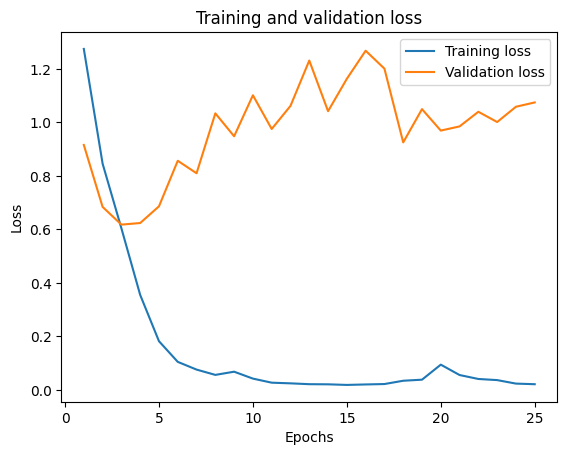

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

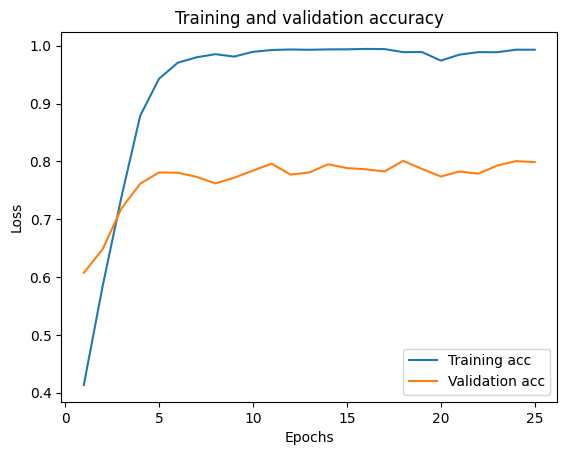

In [ ]:

plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
y_pred = (model.predict(X_test).argmax(axis=-1)).tolist()

class_names = ['negative', 'positive']

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification report : 
               precision    recall  f1-score   support

    negative       0.81      0.81      0.81      1180
    positive       0.80      0.81      0.80      1124

    accuracy                           0.81      2304
   macro avg       0.81      0.81      0.81      2304
weighted avg       0.81      0.81      0.81      2304



Confusion matrix : 



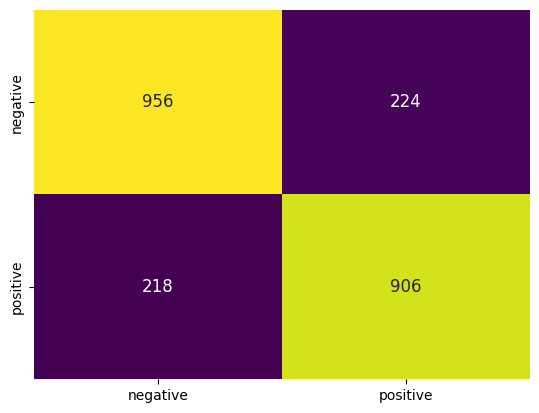

Normalized confusion matrix : 



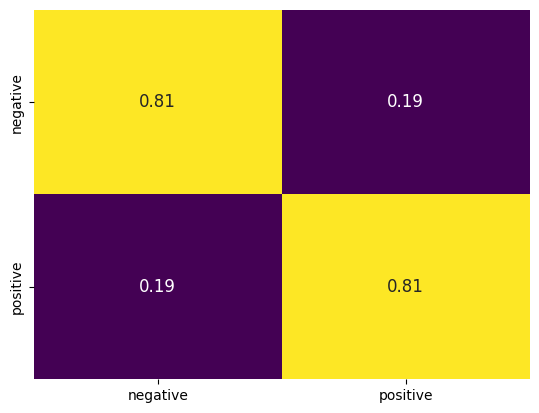

In [ ]:
# Function to draw confusion matrix
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis",xticklabels=class_names,yticklabels=class_names)
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")

# LSTM Model 91%

In [ ]:

# Define the model
model = tf.keras.models.Sequential([
    # Embedding layer
    tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[input_shape]),  # Embedding layer

    # LSTM layer
    tf.keras.layers.LSTM(32, return_sequences=True),  # LSTM layer

    # Batch Normalization after RNN
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # LSTM layer
    tf.keras.layers.LSTM(32, return_sequences=False),  # LSTM layer

    # Batch Normalization after LSTM
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # Dropout layer for regularization
    tf.keras.layers.Dropout(0.25),  # Dropout layer

    # Dense output layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(4, activation="softmax")  # Output layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=22, batch_size=32, validation_split=0.2)

Epoch 1/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9943 - loss: 0.0130 - val_accuracy: 0.9094 - val_loss: 0.5467
Epoch 2/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9944 - loss: 0.0140 - val_accuracy: 0.9024 - val_loss: 0.4092
Epoch 3/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9942 - loss: 0.0150 - val_accuracy: 0.9046 - val_loss: 0.5086
Epoch 4/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9946 - loss: 0.0153 - val_accuracy: 0.9111 - val_loss: 0.3562
Epoch 5/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9951 - loss: 0.0148 - val_accuracy: 0.9029 - val_loss: 0.5728
Epoch 6/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9951 - loss: 0.0126 - val_accuracy: 0.9084 - val_loss: 0.5410
Epoch 7/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9936 - loss: 0.0149 - val_accuracy: 0.9078 - val_loss: 0.4697
Epoch 8/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9948 - loss: 0.0125 - val_accu

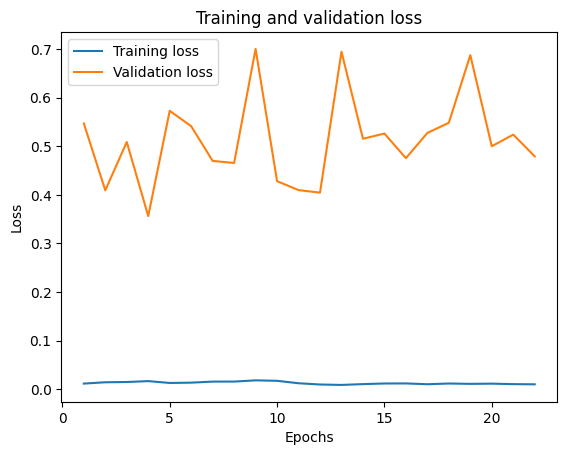

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

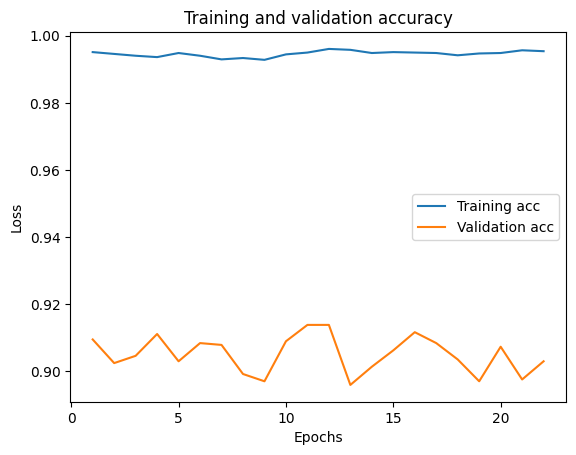

In [ ]:

plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Confusion Matrix
y_pred = (model.predict(X_test).argmax(axis=-1)).tolist()

class_names = ['negative', 'positive']
# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification report : 
               precision    recall  f1-score   support

    negative       0.92      0.90      0.91      1180
    positive       0.89      0.91      0.90      1124

    accuracy                           0.91      2304
   macro avg       0.91      0.91      0.91      2304
weighted avg       0.91      0.91      0.91      2304



Confusion matrix : 



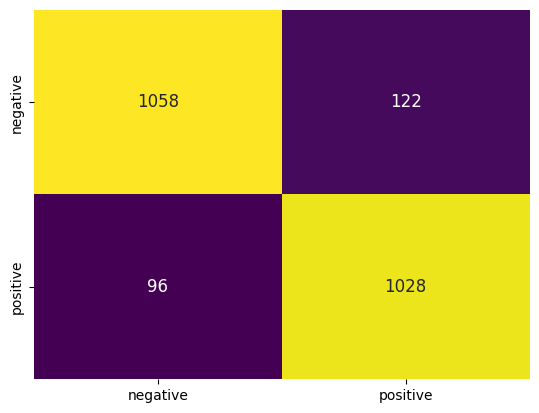

Normalized confusion matrix : 



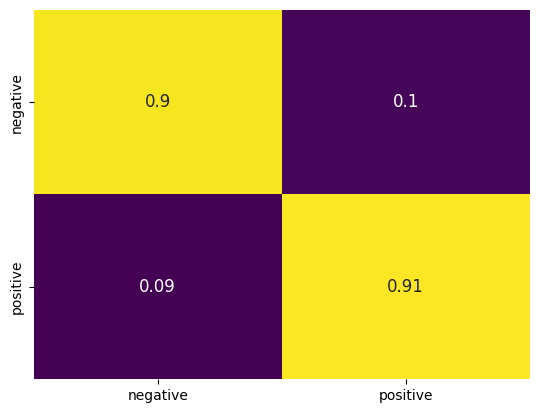

In [ ]:
# Function to draw confusion matrix
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis",xticklabels=class_names,yticklabels=class_names)
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")

# GRU Model 91%

In [ ]:

# Define the model
model = tf.keras.models.Sequential([
    # Embedding layer
    tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[input_shape]),  # Embedding layer

    # GRU layer
    tf.keras.layers.GRU(32, return_sequences=True),  # RNN layer

    # Batch Normalization after GRU
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # GRU layer
    tf.keras.layers.GRU(32, return_sequences=False),  # RNN layer

    # Batch Normalization after GRU
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # Dropout layer for regularization
    tf.keras.layers.Dropout(0.25),  # Dropout layer

    # Dense output layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(4, activation="softmax")  # Output layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9908 - loss: 0.0238 - val_accuracy: 0.9111 - val_loss: 0.4461
Epoch 2/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9913 - loss: 0.0236 - val_accuracy: 0.9094 - val_loss: 0.3878
Epoch 3/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9879 - loss: 0.0330 - val_accuracy: 0.4984 - val_loss: 6.7509
Epoch 4/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9896 - loss: 0.0304 - val_accuracy: 0.9067 - val_loss: 0.4904
Epoch 5/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9917 - loss: 0.0222 - val_accuracy: 0.4881 - val_loss: 1.9389
Epoch 6/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9922 - loss: 0.0200 - val_accuracy: 0.8563 - val_loss: 0.6742
Epoch 7/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9913 - loss: 0.0219 - val_accuracy: 0.9132 - val_loss: 0.3235
Epoch 8/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9946 - loss: 0.0147 - val_accu

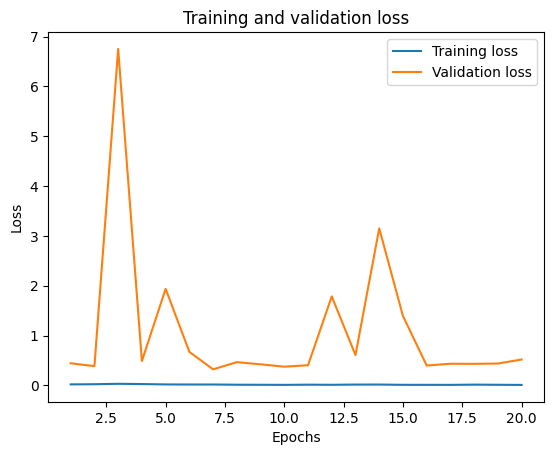

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

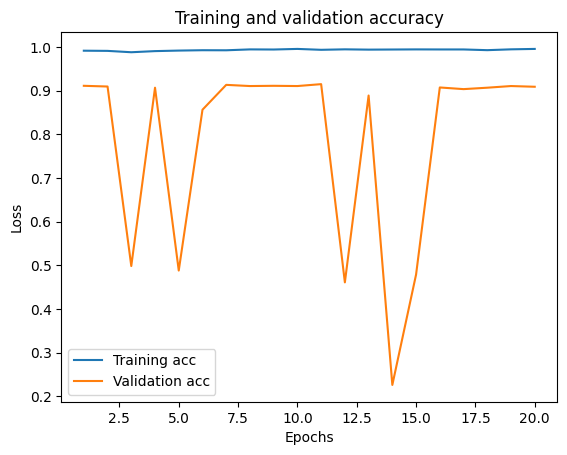

In [ ]:

plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Confusion Matrix
y_pred = (model.predict(X_test).argmax(axis=-1)).tolist()

# Ensure class_names is a list of strings
class_names = ['negative', 'positive']

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification report : 
               precision    recall  f1-score   support

    negative       0.94      0.88      0.91      1180
    positive       0.89      0.94      0.91      1124

    accuracy                           0.91      2304
   macro avg       0.91      0.91      0.91      2304
weighted avg       0.91      0.91      0.91      2304



Confusion matrix : 



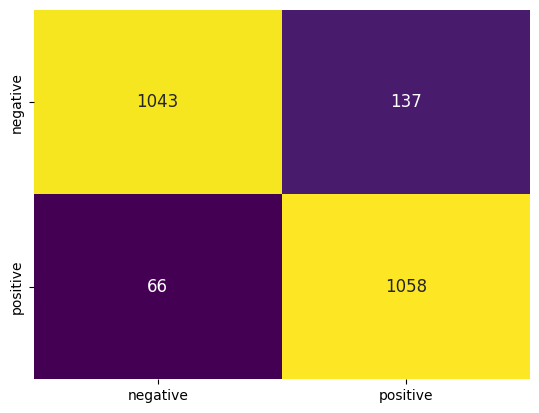

Normalized confusion matrix : 



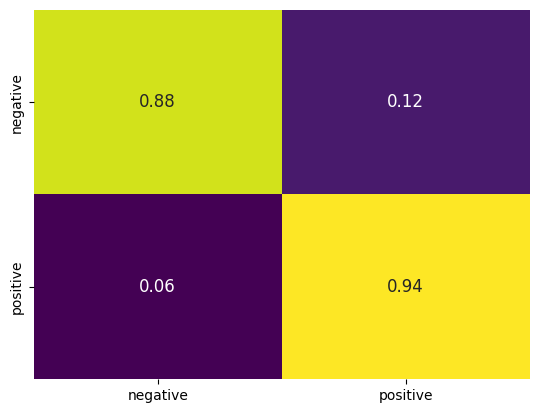

In [ ]:
# Function to draw confusion matrix
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis",xticklabels=class_names,yticklabels=class_names)
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")

# BILSTM Model 91%

In [ ]:
# Define the model (converted to BiLSTM)
model = tf.keras.models.Sequential([
    # Embedding layer
    tf.keras.layers.Embedding(vocab_size+1, 32, input_shape=[input_shape]),  # Embedding layer

    # BiLSTM layer (returns full sequence for stacking)
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=True)
    ),  # BiLSTM layer

    # Batch Normalization after first BiLSTM
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # BiLSTM layer (returns final state only)
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=False)
    ),  # BiLSTM layer

    # Batch Normalization after second BiLSTM
    tf.keras.layers.BatchNormalization(),  # Batch Normalization

    # Dropout layer for regularization
    tf.keras.layers.Dropout(0.25),  # Dropout layer

    # Dense output layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(4, activation="softmax")  # Output layer
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=22, batch_size=32, validation_split=0.2)

Epoch 1/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9968 - loss: 0.0082 - val_accuracy: 0.8980 - val_loss: 0.5412
Epoch 2/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9945 - loss: 0.0110 - val_accuracy: 0.9046 - val_loss: 0.5320
Epoch 3/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9942 - loss: 0.0122 - val_accuracy: 0.9013 - val_loss: 0.5188
Epoch 4/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9959 - loss: 0.0096 - val_accuracy: 0.8975 - val_loss: 0.6731
Epoch 5/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9964 - loss: 0.0118 - val_accuracy: 0.8991 - val_loss: 0.4882
Epoch 6/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9960 - loss: 0.0092 - val_accuracy: 0.9051 - val_loss: 0.4495
Epoch 7/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9040 - val_loss: 0.6849
Epoch 8/22
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9943 - loss: 0.0136 - val_accu

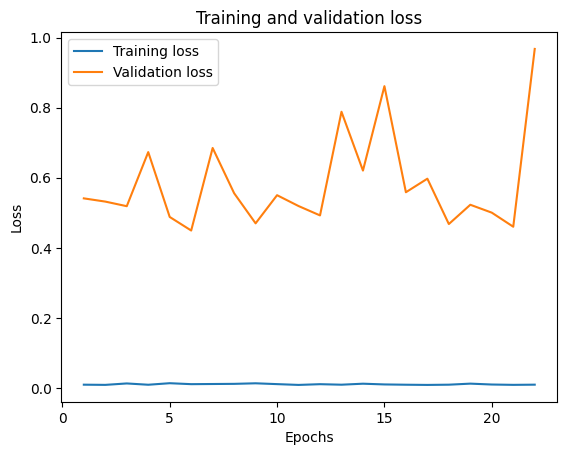

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

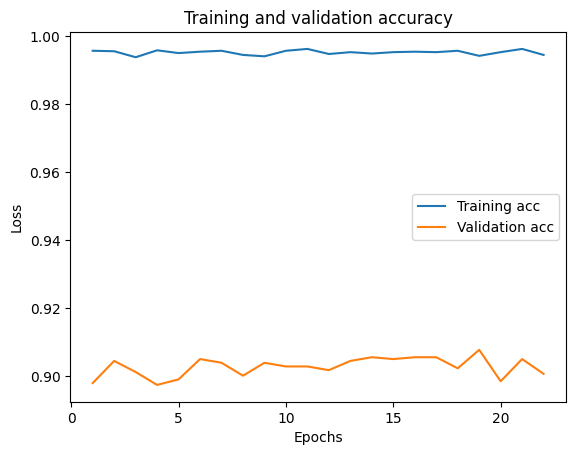

In [ ]:

plt.clf()   # clear figure
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Confusion Matrix
y_pred = (model.predict(X_test).argmax(axis=-1)).tolist()

class_names = ['negative', 'positive']

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification report : 
               precision    recall  f1-score   support

    negative       0.96      0.87      0.91      1180
    positive       0.87      0.96      0.91      1124

    accuracy                           0.91      2304
   macro avg       0.91      0.91      0.91      2304
weighted avg       0.92      0.91      0.91      2304



Confusion matrix : 



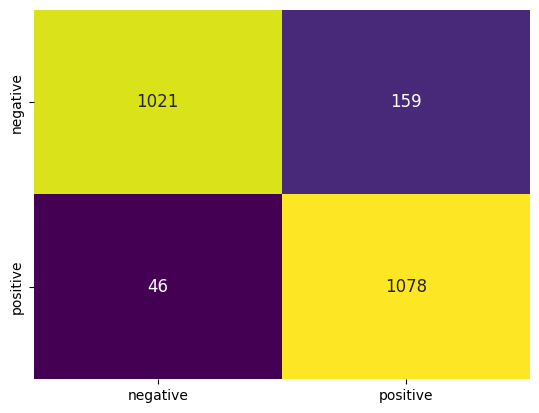

Normalized confusion matrix : 



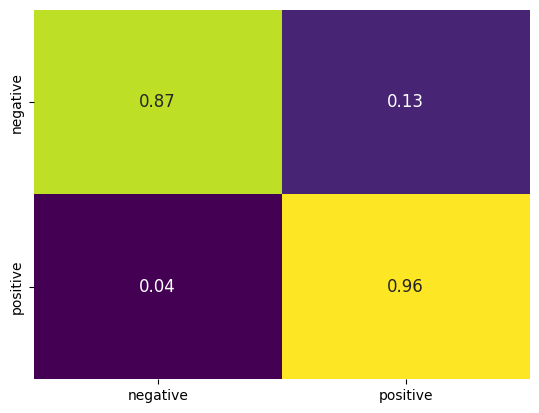

In [ ]:
# Function to draw confusion matrix
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis",xticklabels=class_names,yticklabels=class_names)
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")